In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
np.random.seed(42)

In [5]:
# Loading Data
data = pd.read_csv(r'.\data\iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.set_index("Id", inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
Features = data[['PetalLengthCm', 'PetalWidthCm']]
target = data[['Species']]

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target = encoder.fit_transform(target.values.ravel())

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    Features, target,
    test_size=0.25, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [12]:
ypred = model.predict(xtest)
ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

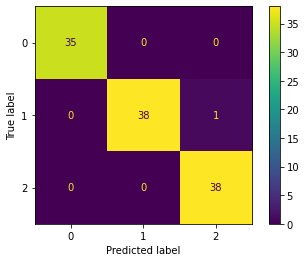

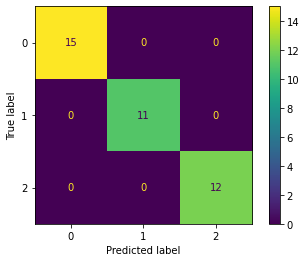

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)

In [17]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(model, Features, target.ravel(), cv=10)

In [19]:
cv
cv.mean()

0.9466666666666667

In [20]:
model.get_params()
DecisionTreeClassifier()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model, 
    param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": [3, 5, 7, 9, 1, 13, 15, 17, 19, 21],
        "max_features": ["sqrt", "log2"],
        "min_samples_split": [3,4,5,6,7,8,9,11, 15, 20, 25]
    }, cv = 8, scoring="accuracy", verbose=1
)
grid.fit(Features, target)

Fitting 8 folds for each of 880 candidates, totalling 7040 fits


GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 1, 13, 15, 17, 19, 21],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 11, 15, 20,
                                               25],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [31]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=21, max_features='sqrt', min_samples_split=7,
                       splitter='random')

In [34]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_split': 7,
 'splitter': 'random'}

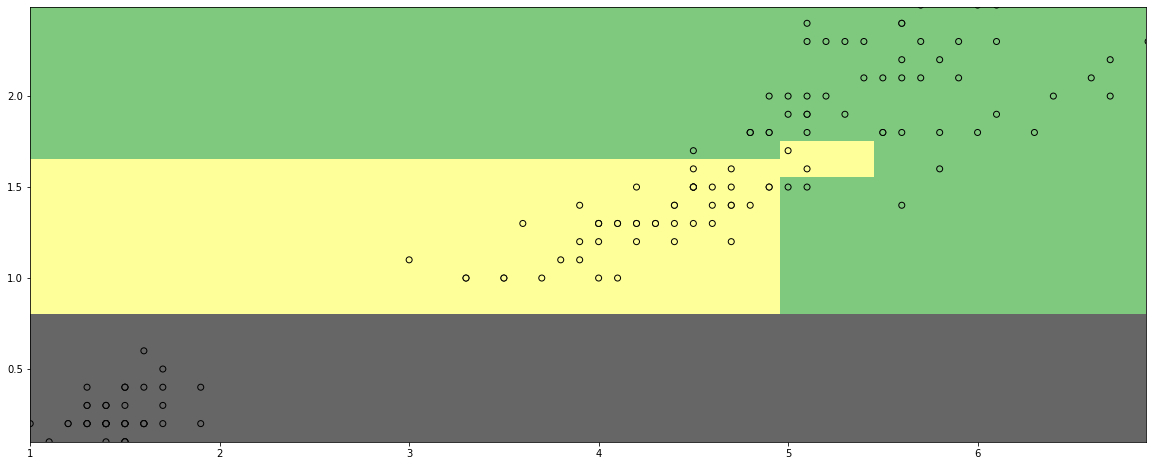

In [33]:
bmodel = DecisionTreeClassifier()
bmodel.fit(Features, target)
# Visualization

xmin, xmax = Features.values[:, 0].min(), Features.values[:, 0].max()
ymin, ymax = Features.values[:, 1].min(), Features.values[:, 1].max()

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xx.shape, yy.shape

xtest = np.c_[xx.ravel(), yy.ravel()]
xtest.shape
ypred = model.predict(xtest)
ypred = ypred.reshape(yy.shape)
ypred

plt.figure(1, figsize=(20,8))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, ypred, shading='auto')

plt.scatter(Features.values[:, 0], Features.values[:, 1], c=target, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

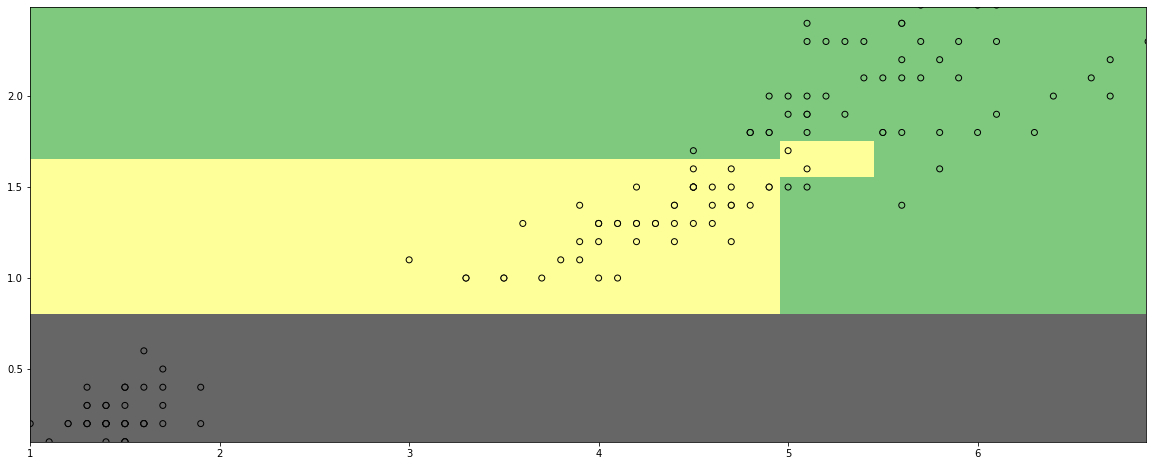

In [29]:
bmodel = grid.best_estimator_
bmodel.fit(Features, target)
# Visualization

xmin, xmax = Features.values[:, 0].min(), Features.values[:, 0].max()
ymin, ymax = Features.values[:, 1].min(), Features.values[:, 1].max()

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xx.shape, yy.shape

xtest = np.c_[xx.ravel(), yy.ravel()]
xtest.shape
ypred = model.predict(xtest)
ypred = ypred.reshape(yy.shape)
ypred

plt.figure(1, figsize=(20,8))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, ypred, shading='auto')

plt.scatter(Features.values[:, 0], Features.values[:, 1], c=target, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor()